In [35]:
import pandas as pd
import numpy as np
import scipy.sparse
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import json

In [2]:
tfidf = scipy.sparse.load_npz('../data/intermediary/tfidf_matrix.npz')

In [3]:
df = pd.read_csv('../data/intermediary/province_varietal.csv')

In [4]:
top_pv = []
with open('../data/intermediary/top_pv.txt', 'r') as f:
    for line in f:
        top_pv.append(line.strip('\n'))

In [27]:
top_df = df[df.province_varietal.isin(top_pv)]

In [6]:
features = []
with open('../data/intermediary/features.txt', 'r') as f:
    for line in f:
        features.append(line.strip('\n'))

In [7]:
top_tfidf = tfidf[top_df.index]

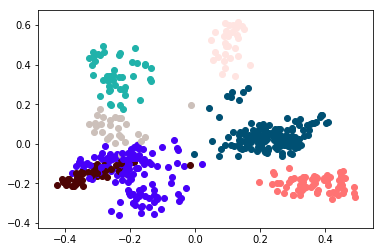

In [8]:
num_clusters = 7
num_seeds = 7
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(top_tfidf)
# print labels

X = top_tfidf.todense()

# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

In [28]:
top_df['cluster'] = labels
top_df['coord_x'], top_df['coord_y'] = reduced_data.T

/Users/pnguyen/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/pnguyen/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
embed = top_df[['province_varietal', 'cluster', 'coord_x', 'coord_y']].set_index('province_varietal'
                                                                        ).to_dict(orient='index')

In [40]:
with open('../data/intermediary/tfidf.json') as f:
    json.load(f)

In [ ]:
clusters = {}
for pv, vals in embed.items():
    clusters[pv] = {**vals, }

In [36]:
with open('../data/processed/clusters.json', 'w') as fp:
    json.dump(, fp)